# Overfitting
## In this lab, we are going to explore how thoughtfully choosing a model and using test set are important parts of avoiding overfitting. 

We are going to apply these concepts to a classification model. We want to develop a decision boundary, on one side of which we have class A and on the other we have class B.

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever), and sucks only slightly less than overfitting. At least your model performs consistently bad :)


### First, we are going to generate some synthetic data. To make these concepts visual, we are going to generate this data to be concentric circles. Run the code below to do so. 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

### As our classification algorithm, we are going to use a type of SVM with a radial basis function. This basically works by mapping each point into a higher dimensional space that can be split by the SVM (gross oversimplificaiton). That looks something like this:
![RBFSVM.png](http://localhost:8889/view/Downloads/Ironhack/DA/DAFT_257/module_3/Lab_11_Problem-in-ML/RBFSVM.png)

### We can change thecomplexity of the decision boundaries applied by the SVM by changignt the size of the radial basis function, through the parameter 'gamma'.

Instantiate a list of three SVM classifiers with three different gamma parameters, (.001, 1, and 20).

In [3]:
# Your code here
from sklearn.svm import SVC

gamma = [0.001, 1, 20]

classifiers = [SVC(gamma=g) for g in gamma]
names = ['gamma_0.001', 'gamma_1', 'gamma_20']

### Now, we are going to plot the boundaries created by each of these classifiers with the points we generated. Run the following code to make three graphs of each SVM classifier.

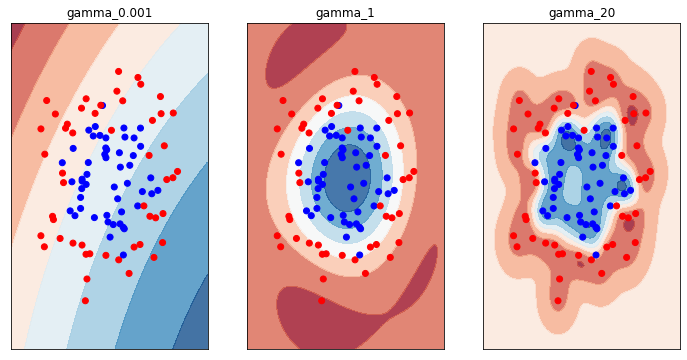

In [4]:
from matplotlib.colors import ListedColormap

figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Where the contour is red, we will predict red, and same for blue; white means there is a 50/50 chance of either class
Explain what you see in the plots above.

Which gamma do you think fits the data best? 

What would you select as the opitmal gamma?

In [5]:
# Your response here
'''
For me it looks like the gamma equal to 1 is the best choice. 
The gamma 0.001 doesn't predict correctly the colors. The result with gamma 20 on the other hand, look overfitted. The contours follow exctly the points. Thus the best fit is for gamma 1.
'''

"\nFor me it looks like the gamma equal to 1 is the best choice. \nThe gamma 0.001 doesn't predict correctly the colors. The result with gamma 20 on the other hand, look overfitted. The contours follow exctly the points. Thus the best fit is for gamma 1.\n"

### Without having used a training and testing set, lets see what our accuracy score would be for, for example, a gamma of .7. Use the .score() method.

In [6]:
# Your code here
clf_07=SVC(gamma=0.7)
clf_07.fit(X,y)
print(clf_07.score(X,y)*100)

93.0


### Wow thats good accuracy! But is it generalizable? Make a test/train split and see how the model performs on the SVM with the gamma of 20. 

In [7]:
# Your code here
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 15)

In [8]:
clf_20=SVC(gamma=20)
clf_20.fit(x_train,y_train)

print(clf_20.score(x_test,y_test)*100)
print(clf_20.score(x_train,y_train)*100)

85.0
97.5


### Try with some of the other gammas to see how the accuracy score changes after implementing a test/train split. 

In [9]:
# Your code here
results = {}
for gamma in np.arange(0.001,20,0.1):
    key= str(gamma)
    model=SVC(gamma=gamma)
    model.fit(x_train,y_train)
    results[key]=[model.score(x_test,y_test)*100,model.score(x_train,y_train)*100]

In [10]:
results

{'0.001': [45.0, 51.24999999999999],
 '0.101': [35.0, 62.5],
 '0.201': [75.0, 80.0],
 '0.30100000000000005': [85.0, 88.75],
 '0.401': [85.0, 92.5],
 '0.501': [90.0, 91.25],
 '0.6010000000000001': [85.0, 91.25],
 '0.7010000000000001': [85.0, 92.5],
 '0.801': [85.0, 91.25],
 '0.901': [85.0, 91.25],
 '1.001': [85.0, 90.0],
 '1.101': [85.0, 90.0],
 '1.201': [85.0, 90.0],
 '1.301': [85.0, 91.25],
 '1.401': [85.0, 91.25],
 '1.501': [85.0, 91.25],
 '1.601': [85.0, 91.25],
 '1.701': [90.0, 91.25],
 '1.801': [90.0, 90.0],
 '1.901': [85.0, 90.0],
 '2.001': [85.0, 90.0],
 '2.101': [85.0, 90.0],
 '2.201': [85.0, 90.0],
 '2.301': [80.0, 90.0],
 '2.4010000000000002': [85.0, 90.0],
 '2.501': [85.0, 90.0],
 '2.601': [85.0, 90.0],
 '2.701': [85.0, 90.0],
 '2.801': [85.0, 90.0],
 '2.9010000000000002': [85.0, 90.0],
 '3.001': [85.0, 90.0],
 '3.101': [85.0, 90.0],
 '3.201': [85.0, 90.0],
 '3.301': [85.0, 90.0],
 '3.4010000000000002': [85.0, 90.0],
 '3.501': [85.0, 91.25],
 '3.601': [85.0, 91.25],
 '3.701'

### Was your previous model overfitting? If so, how would you try to improve this model to prevent this?

In [11]:
# Your response here
'''
It was overfitting as the score of test was much lower then for the train. 
To avoid that problem I would use the approach with testing diffrent values of gamma and compare results frol the test and the train as it was done above. Basing on that I would say that gamma in range 0.5-1 would be the best.
'''

'\nIt was overfitting as the score of test was much lower then for the train. \nTo avoid that problem I would use the approach with testing diffrent values of gamma and compare results frol the test and the train as it was done above. Basing on that I would say that gamma in range 0.5-1 would be the best.\n'